# NASA Exoplanets Analysis

![Exoplanets Image](https://exoplanets.nasa.gov/internal_resources/2730/Artists_concept_of_exoplanets_-_for_Starlight_Suppression_workshop.jpeg)

The NASA Exoplanet Archive is a database that contains information on all known exoplanets (planets outside our solar system) discovered by NASA's various space missions, ground-based observatories, and other sources. The dataset includes information such as the planet's name, mass, radius, distance from its host star, orbital period, and other physical characteristics. The archive is updated regularly as new exoplanets are discovered, and it is a valuable resource for astronomers studying the properties and distribution of exoplanets in our galaxy.

In [1]:
import pandas as pd
import numpy as np
import sklearn
import warnings
import matplotlib.pylab as pla
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.compose import make_column_selector as selector
from sklearn.compose import TransformedTargetRegressor
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from tabulate import tabulate
from scipy import stats
import statsmodels.api as sm
import plotly.graph_objects as go
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('NASA Exoplanets.csv')

## EDA (Exploratory Data Analysis)

In this section I firstly take a general look on the data to familiarise myself with the different values. 

Then I visualize the data and compare certain values to eachother in order to gain a deeper understanding of the ways they relate to eachother. 

This is where I start to formulate questions and hypotheses that I will investigate further.

In [3]:
df.shape

(5250, 13)

In [4]:
pd.set_option("display.max.columns", df.shape[1])

In [5]:
df.head(20)

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
0,11 Comae Berenices b,304.0,4.72307,Gas Giant,2007,19.40000,Jupiter,1.080,Jupiter,1.290000,0.892539,0.23,Radial Velocity
1,11 Ursae Minoris b,409.0,5.01300,Gas Giant,2009,14.74000,Jupiter,1.090,Jupiter,1.530000,1.400000,0.08,Radial Velocity
2,14 Andromedae b,246.0,5.23133,Gas Giant,2008,4.80000,Jupiter,1.150,Jupiter,0.830000,0.508693,0.00,Radial Velocity
3,14 Herculis b,58.0,6.61935,Gas Giant,2002,8.13881,Jupiter,1.120,Jupiter,2.773069,4.800000,0.37,Radial Velocity
4,16 Cygni B b,69.0,6.21500,Gas Giant,1996,1.78000,Jupiter,1.200,Jupiter,1.660000,2.200000,0.68,Radial Velocity
5,17 Scorpii b,408.0,5.22606,Gas Giant,2020,4.32000,Jupiter,1.150,Jupiter,1.450000,1.600000,0.06,Radial Velocity
6,18 Delphini b,249.0,5.51048,Gas Giant,2008,10.30000,Jupiter,1.110,Jupiter,2.600000,2.700000,0.08,Radial Velocity
7,1RXS J160929.1-210524 b,454.0,12.61800,Gas Giant,2008,8.00000,Jupiter,1.664,Jupiter,330.000000,6505.900000,0.00,Direct Imaging
8,24 Bootis b,313.0,5.59000,Gas Giant,2018,0.91000,Jupiter,1.240,Jupiter,0.190000,0.083231,0.04,Radial Velocity
9,24 Sextantis b,235.0,6.45350,Gas Giant,2010,1.99000,Jupiter,1.190,Jupiter,1.333000,1.239699,0.09,Radial Velocity


In [6]:
df.describe(include = 'all')

,name,distance,stellar_magnitude,planet_type,discovery_year,mass_multiplier,mass_wrt,radius_multiplier,radius_wrt,orbital_radius,orbital_period,eccentricity,detection_method
count,5250,5233.000000,5089.000000,5250,5250.000000,5227.000000,5227,5233.000000,5233,4961.000000,5.250000e+03,5250.000000,5250
unique,5250,NaN,NaN,5,NaN,NaN,2,NaN,2,NaN,NaN,NaN,11
top,11 Comae Berenices b,NaN,NaN,Neptune-like,NaN,NaN,Earth,NaN,Jupiter,NaN,NaN,NaN,Transit
freq,1,NaN,NaN,1825,NaN,NaN,3586,NaN,3310,NaN,NaN,NaN,3945
mean,NaN,2167.168737,12.683738,NaN,2015.732190,6.434812,NaN,1.015121,NaN,6.962942,4.791509e+02,0.063568,NaN
std,NaN,3245.522087,3.107571,NaN,4.307336,12.972727,NaN,0.603479,NaN,138.673600,1.680445e+04,0.141424,NaN
min,NaN,4.000000,0.872000,NaN,1992.000000,0.020000,NaN,0.200000,NaN,0.004400,2.737851e-04,-0.520000,NaN
25%,NaN,389.000000,10.939000,NaN,2014.000000,1.804000,NaN,0.325000,NaN,0.053000,1.259411e-02,0.000000,NaN
50%,NaN,1371.000000,13.543000,NaN,2016.000000,4.170140,NaN,1.120000,NaN,0.102800,3.449692e-02,0.000000,NaN
75%,NaN,2779.000000,15.021000,NaN,2018.000000,8.000000,NaN,1.410000,NaN,0.286000,1.442163e-01,0.060000,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5250 entries, 0 to 5249
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               5250 non-null   object 
 1   distance           5233 non-null   float64
 2   stellar_magnitude  5089 non-null   float64
 3   planet_type        5250 non-null   object 
 4   discovery_year     5250 non-null   int64  
 5   mass_multiplier    5227 non-null   float64
 6   mass_wrt           5227 non-null   object 
 7   radius_multiplier  5233 non-null   float64
 8   radius_wrt         5233 non-null   object 
 9   orbital_radius     4961 non-null   float64
 10  orbital_period     5250 non-null   float64
 11  eccentricity       5250 non-null   float64
 12  detection_method   5250 non-null   object 
dtypes: float64(7), int64(1), object(5)
memory usage: 533.3+ KB


In [8]:
df.columns

Index(['name', 'distance', 'stellar_magnitude', 'planet_type',
       'discovery_year', 'mass_multiplier', 'mass_wrt', 'radius_multiplier',
       'radius_wrt', 'orbital_radius', 'orbital_period', 'eccentricity',
       'detection_method'],
      dtype='object')

In [9]:
df.dtypes

name                  object
distance             float64
stellar_magnitude    float64
planet_type           object
discovery_year         int64
mass_multiplier      float64
mass_wrt              object
radius_multiplier    float64
radius_wrt            object
orbital_radius       float64
orbital_period       float64
eccentricity         float64
detection_method      object
dtype: object

In [10]:
df.isnull().values.any()

True

In [11]:
df.isnull().sum()

name                   0
distance              17
stellar_magnitude    161
planet_type            0
discovery_year         0
mass_multiplier       23
mass_wrt              23
radius_multiplier     17
radius_wrt            17
orbital_radius       289
orbital_period         0
eccentricity           0
detection_method       0
dtype: int64

In [12]:
df.duplicated().sum()

0

<AxesSubplot:ylabel='planet_type'>

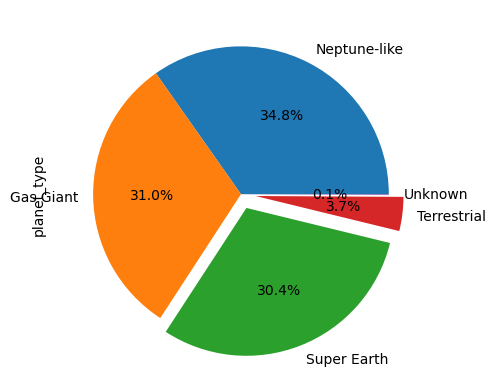

In [13]:
df['planet_type'].value_counts().plot(kind='pie',autopct='%.1f%%',explode=[0,0,0.1,0.1,0])

<AxesSubplot:xlabel='planet_type', ylabel='count'>

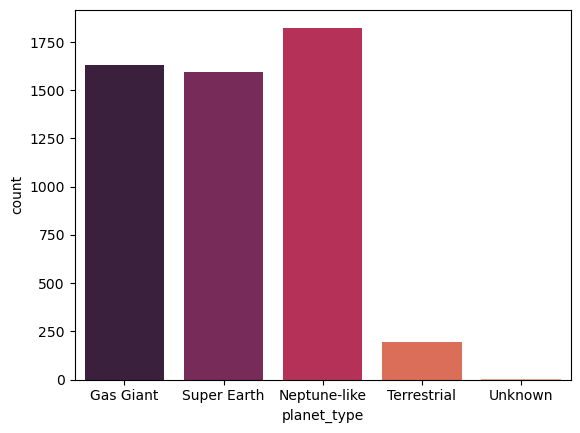

In [14]:
sb.countplot(x='planet_type', data=df, palette="rocket")

<AxesSubplot:>

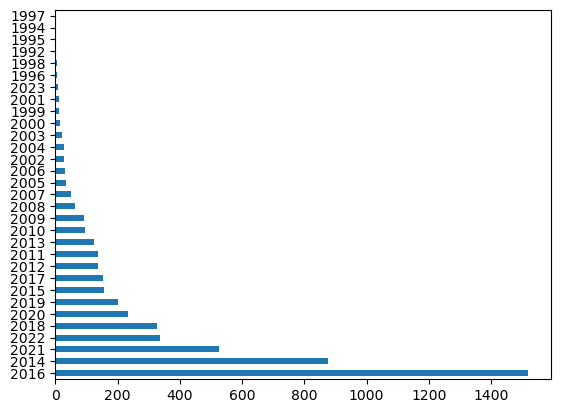

In [15]:
df['discovery_year'].value_counts().plot(kind='barh')

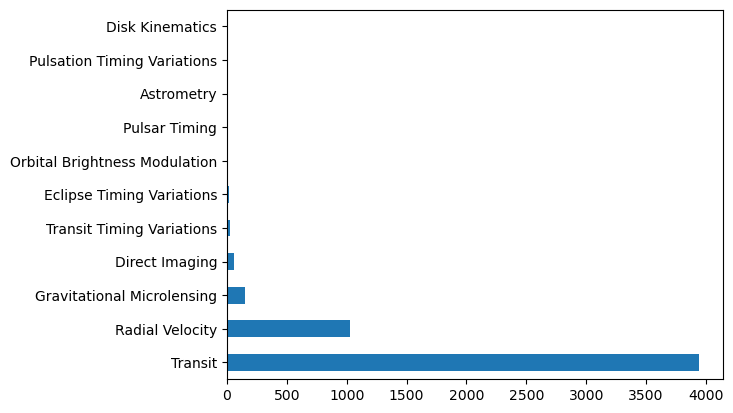

In [16]:
df['detection_method'].value_counts().plot.barh();

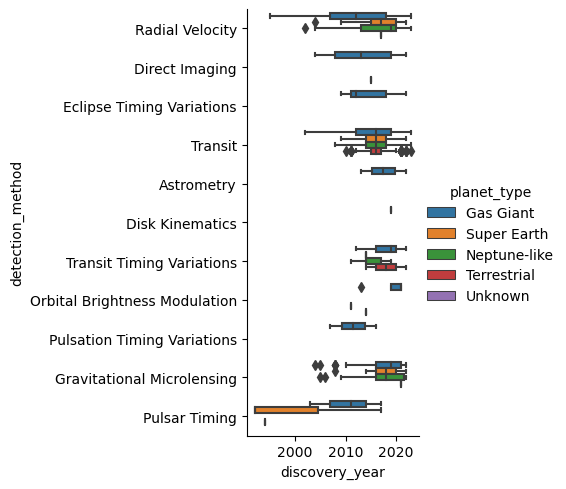

In [17]:
sb.catplot(data=df, x="discovery_year", y="detection_method", hue="planet_type", kind="box")

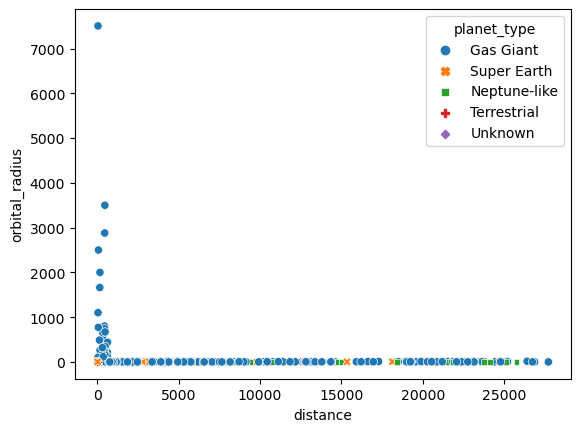

In [18]:
sb.scatterplot(x = "distance", y = "orbital_radius", hue = "planet_type", style = "planet_type",data = df);

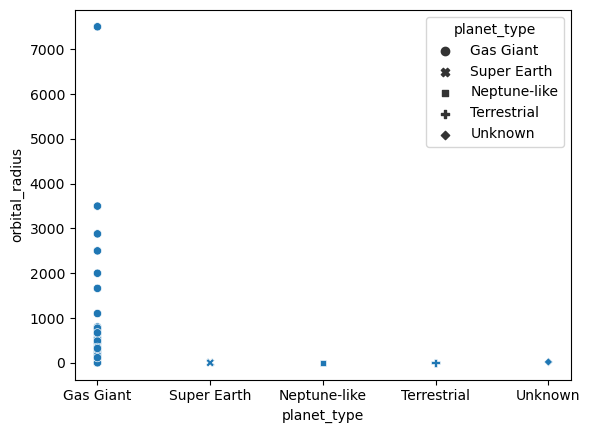

In [19]:
sb.scatterplot(x = "planet_type", y = "orbital_radius", style = "planet_type",data = df);

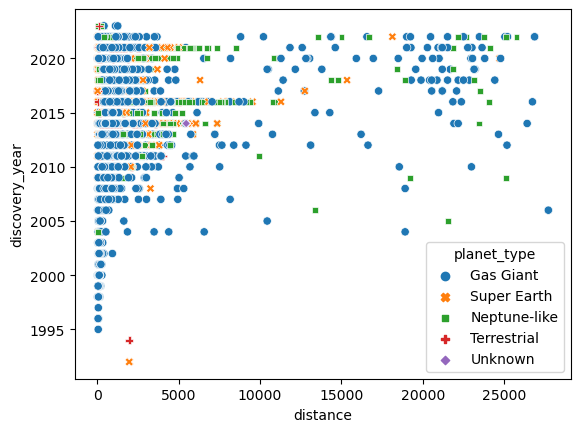

In [20]:
sb.scatterplot(x = "distance", y = "discovery_year", hue = "planet_type", style = "planet_type",data = df);

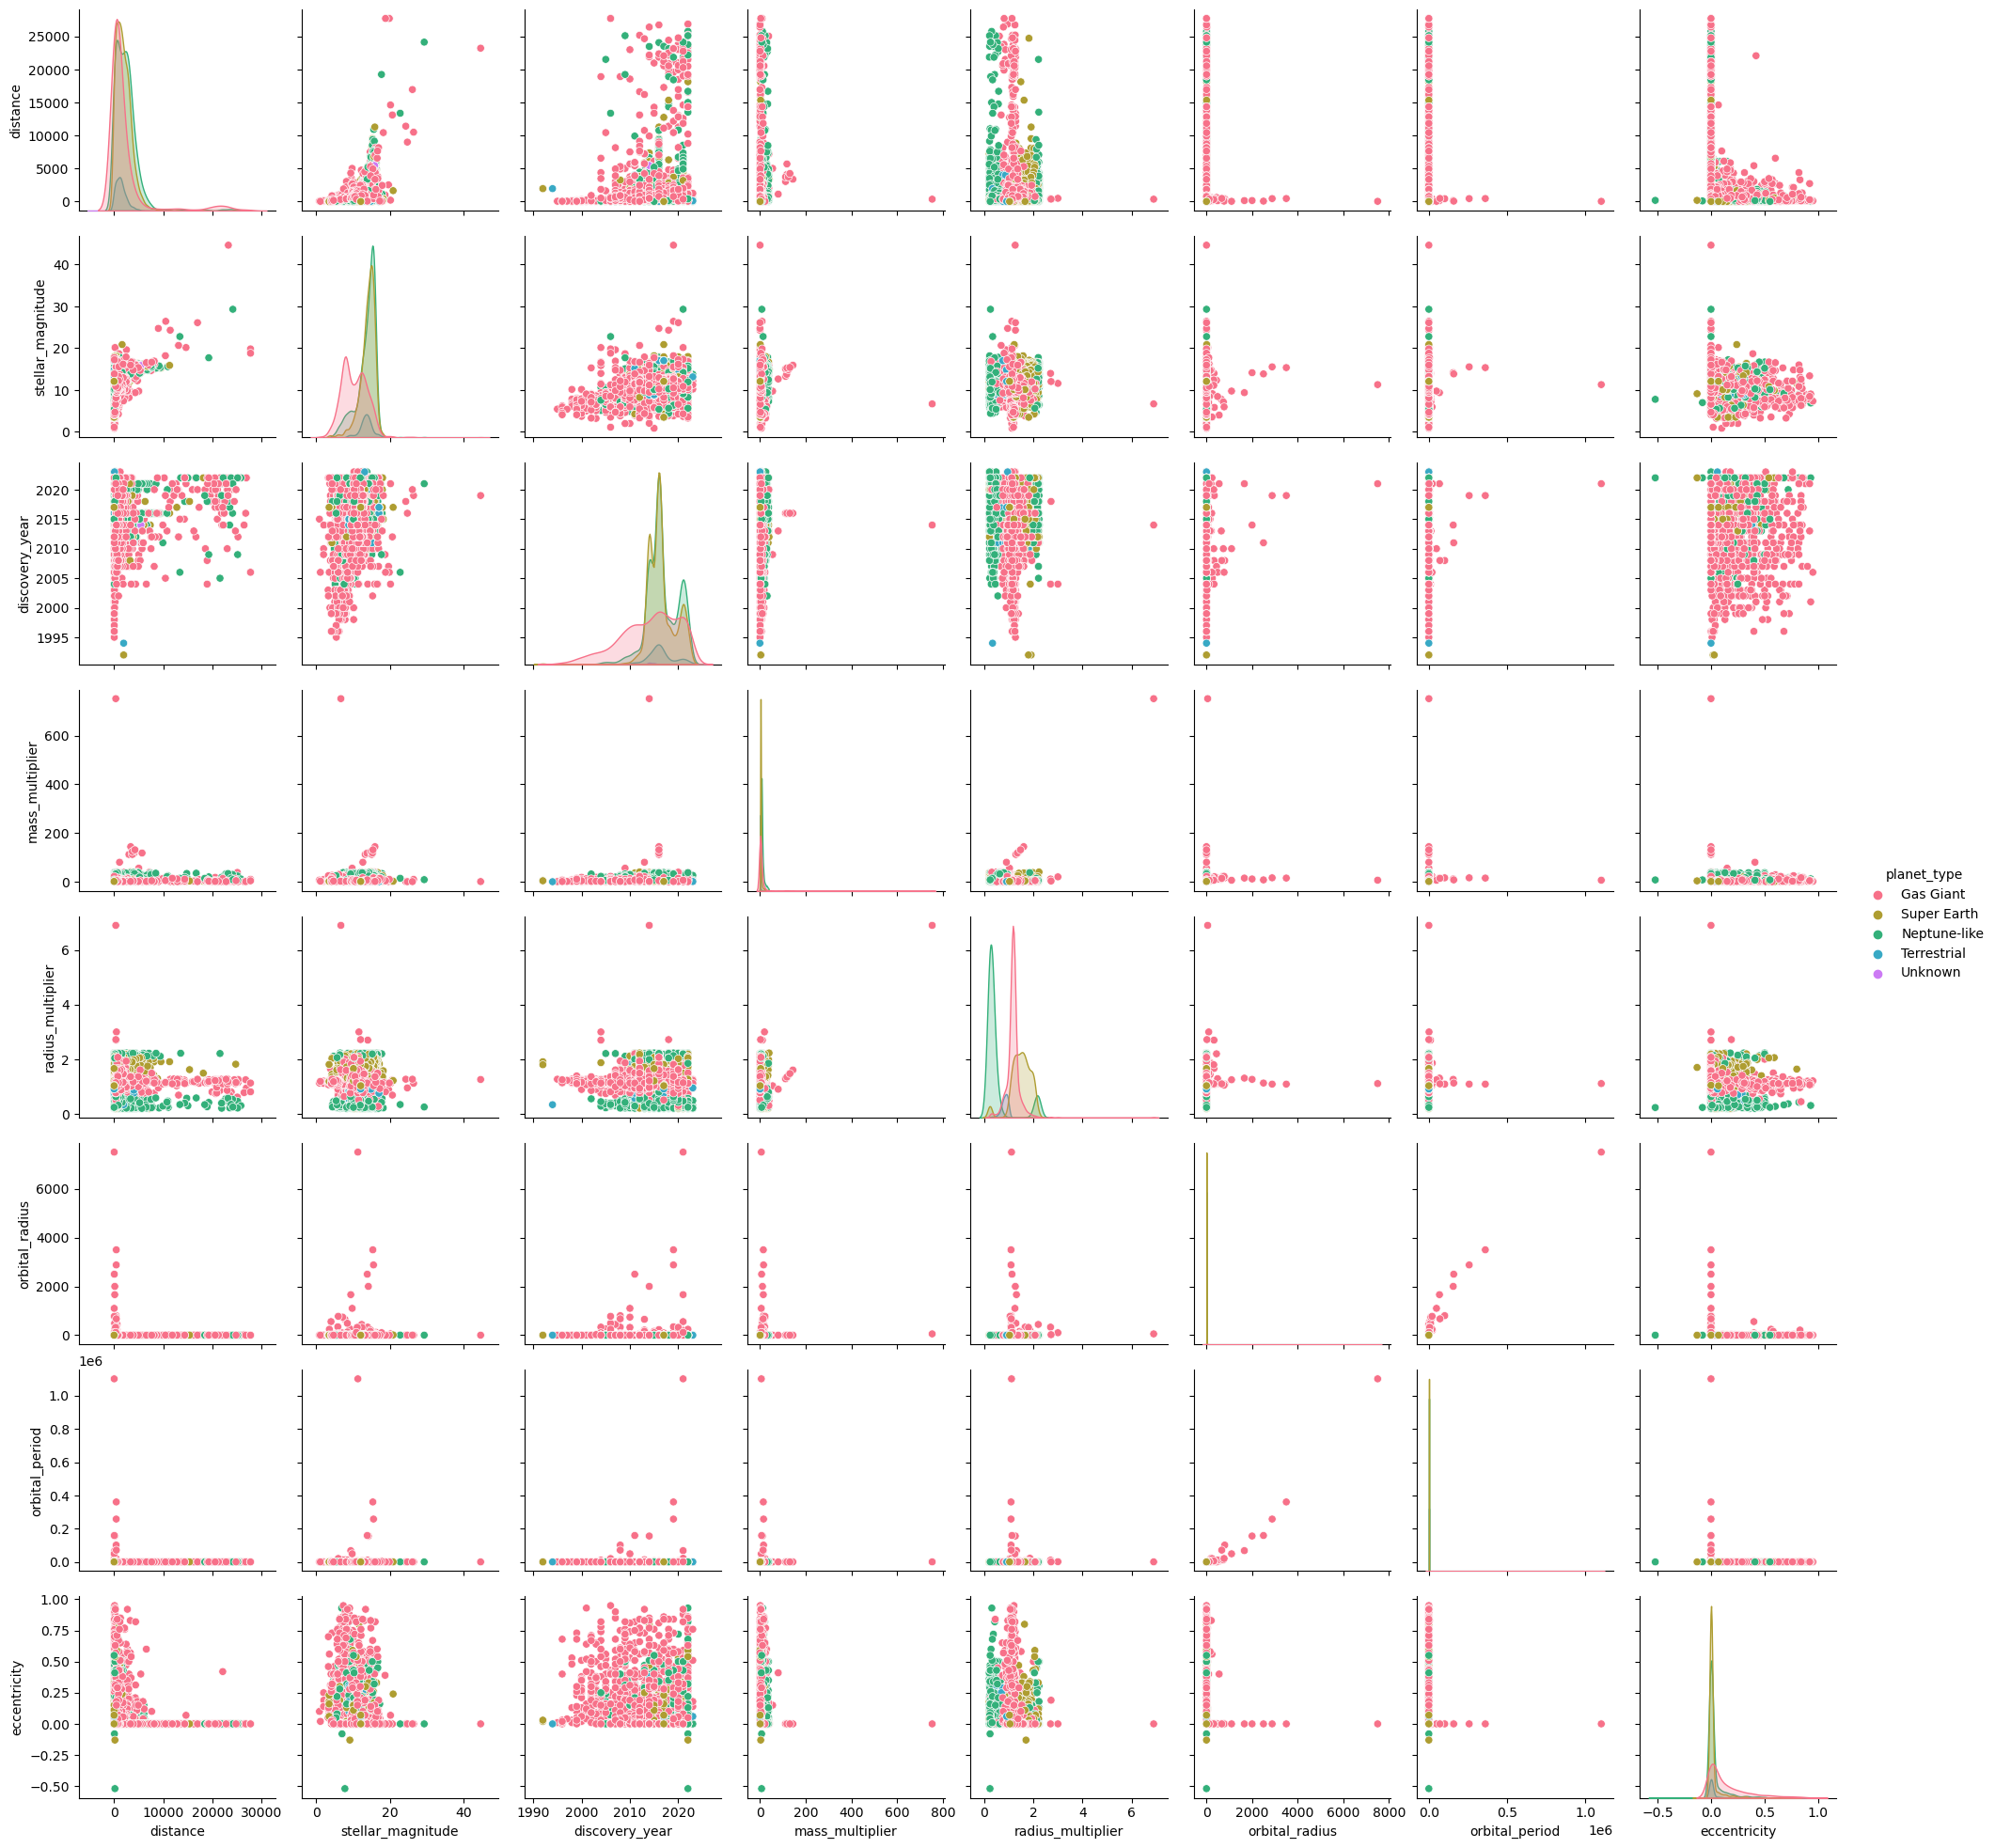

In [21]:
df_corr = df[['distance', 'stellar_magnitude', 'discovery_year', 'mass_multiplier',
              'mass_wrt', 'radius_multiplier', 'radius_wrt', 'orbital_radius',
              'orbital_period', 'eccentricity', 'detection_method', 'planet_type']]

sb.pairplot(df_corr, hue='planet_type', palette='husl')
plt.show()

## Feature Engineering

Considering the fact that the outlier that is present in the distance and orbital_radius columns is a planet whose orbit is very far away from the star that it is rotating around, I decide to leave it in the dataset. Since it is an real value and not an error, I will include it to not exclude the possibility of other edge cases in the model prediction.

[When should I remove an outlier from my dataset?](https://www.scribbr.com/frequently-asked-questions/when-to-remove-an-outlier/)

First I run the train/test split on the dataframe. This is done before any preprocessing in order to prevent any data leakage from occurring. I also save the columns to a list to be able to trace them later.

Then I continue with converting the categorical values in the dataset to numerical ones within a preprocessing pipeline that ensures the transformation of columns is done correctly by filtering and checking datatypes of the supplied dataset.

The missing values are imputed with the KNN imputer, this is because of the mix of categorical and numerical values present in the dataset. Another benefit of using the KNN imputer is that it preserves the distribution of the data.

I also include a StandarScaler in the preprocessing pipeline as it is standard practice to scale down features before using a Gradient Boosting model.

In [22]:
X = df.drop(['planet_type'], axis=1)
Y = df['planet_type']

In [23]:
x_train, x_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.35, random_state=42)

y_train = pd.DataFrame({'target': Y_train})
y_test = pd.DataFrame({'target': Y_test})

In [24]:
#This function was written with the help of ChatGPT3.5 and then modified.

def preprocess_data(df, target=None, x_test=None, y_test=None):
    if isinstance(df, np.ndarray):
        df = pd.DataFrame(df)
    
    columns_to_encode = ['name', 'planet_type', 'mass_wrt', 'radius_wrt', 'detection_method']
    
    existing_columns = [col for col in columns_to_encode if col in df.columns]
    
    categorical_columns = df[existing_columns].select_dtypes(include=['object']).columns
    numeric_columns = df.columns.difference(categorical_columns)

    missing_numeric_columns = df[numeric_columns].columns[df[numeric_columns].isnull().any()]

    numeric_transformer = Pipeline(steps=[
        ('imputer', KNNImputer()),
        ('scaler', StandardScaler())
    ])

    numeric_columns_with_missing = [col for col in numeric_columns if col in missing_numeric_columns]

    categorical_imputer = SimpleImputer(strategy='most_frequent')
    categorical_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
    
    categorical_columns_with_missing = df[categorical_columns].columns[df[categorical_columns].isnull().any()]

    if categorical_columns.any():
        categorical_columns_to_encode = categorical_columns.union(categorical_columns_with_missing)
        categorical_transformer = Pipeline(steps=[
            ('imputer', categorical_imputer),
            ('encoder', categorical_encoder)
        ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_columns_with_missing),
            ('cat', categorical_transformer, categorical_columns_to_encode),
        ])

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
    ])

    transformed_data = pipeline.fit_transform(df)
    new_columns = df.columns.tolist()
    
    if target is not None and x_test is not None and y_test is not None:
        transformed_x_test = pipeline.transform(x_test)

        y_train_flat = target.values.ravel()
        y_test_flat = y_test.values.ravel()

        label_transformer = LabelEncoder()
        encoded_target_train = label_transformer.fit_transform(y_train_flat)
        encoded_target_test = label_transformer.transform(y_test_flat)

        return transformed_data, encoded_target_train, transformed_x_test, encoded_target_test, new_columns
    else:
        return transformed_data, new_columns

x_train, y_train, x_test, y_test, column_names = preprocess_data(x_train, y_train, x_test, y_test)

## Setting up the models

The goal of my analysis is to measure the varying probability of discovery of the different planet types by comparing the  values that are correlated to them. 

For example, is there any pattern to be found by analysing the orbital radius that different types of planets inhabit? Because of this, I will set the planet_type column as my target variable.

I choose to use a Decision Tree model and a Gradient Boosting model because they are able to handle non-linear relationships in the different datapoints with relative ease when compared to other models. Another reason is that they both provide feature importance scores, which can be used to investigate the factors that are of importance when predicting the characteristics of exoplanets.

I also check the accuracy scores of the models before hyperparameter tuning to use as a baseline for comparison.

In [25]:
dt = DecisionTreeClassifier().fit(x_train,y_train)
y_pred = dt.predict(x_test)
accuracy_score(y_test,y_pred)

0.9825897714907508

In [26]:
gbm = GradientBoostingClassifier().fit(x_train,y_train)
y_pred = gbm.predict(x_test)
accuracy_score(y_test,y_pred)

0.9782372143634385

## Hyperparameter Tuning

In this section I choose to use Grid Search for the Decision Tree model and Randomized Search for the Gradient Boosting model. 

The reasoning being that the Decision Tree model isn't computationally intensive and so can be tuned with Grid Search that extensively exhausts all possible combinations of parameters. 

On the other hand, Gradient Boosting is a more complex model that requires a lot more in terms of computational resources, so using a Randomized Search is a good way to maintain computaional efficiency while still thoroughly exploring different combinations of parameters.

In [27]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 5, 10],
    'min_samples_split': [2, 14, 28],
    'min_samples_leaf': [1, 10, 20],
    'max_features': [None, 'sqrt', 'log2']
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=6, scoring='accuracy', n_jobs=-1) 
grid_search.fit(x_train, y_train)

best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_dt_model = grid_search.best_estimator_

dt_test_accuracy = best_dt_model.score(x_test, y_test)
print("Test Accuracy:", dt_test_accuracy)

C:\Users\Stefan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=6.
  warnings.warn(


Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 0.9815016322089227


In [28]:
param_dist = {
    'learning_rate': uniform(0.01, 0.1),
    'n_estimators': randint(15, 30),
    'max_depth': randint(1, 4),
}

gbm = GradientBoostingClassifier()

random_search = RandomizedSearchCV(estimator=gbm, param_distributions=param_dist, n_iter=30, cv=4, scoring='accuracy', n_jobs=-1, random_state=42) #Set n_jobs to the amount of processor cores available on your current machine
random_search.fit(x_train, y_train)

best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

best_gbm_model = random_search.best_estimator_

gbm_test_accuracy = best_gbm_model.score(x_test, y_test)
print("Test Accuracy:", gbm_test_accuracy)

Best Hyperparameters: {'learning_rate': 0.025601864044243652, 'max_depth': 3, 'n_estimators': 21}
Test Accuracy: 0.9782372143634385


## Results and Conclusions

I start by visualizing the feature importance scores for each model to identify features that are important for the model predictions. This can then be used to interpret what features have the strongest relationships with the target variable. 

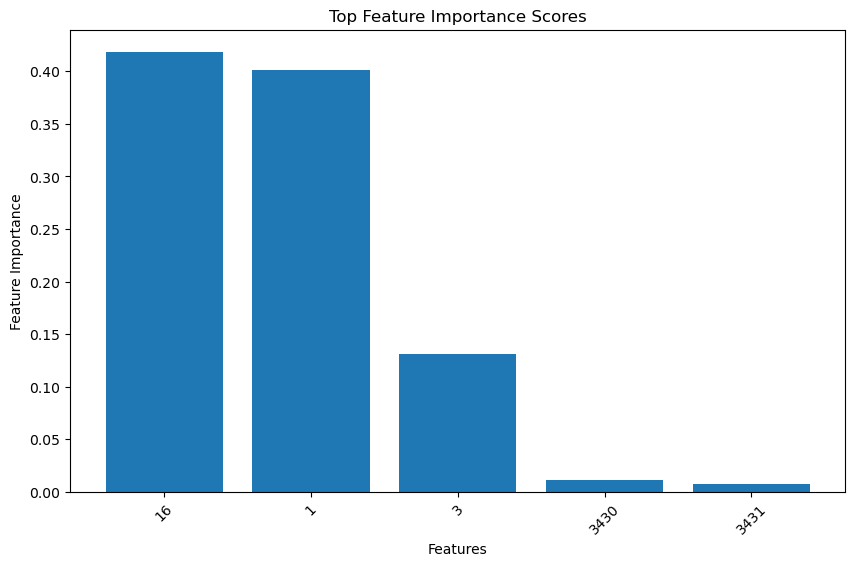

In [37]:
feature_importances = best_dt_model.feature_importances_

num_top_features = 5
top_feature_indices = np.argsort(feature_importances)[::-1][:num_top_features]

top_features = [str(i) for i in top_feature_indices]

top_feature_importances = feature_importances[top_feature_indices]

plt.figure(figsize=(10, 6))
plt.bar(top_features, top_feature_importances)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Top Feature Importance Scores')
plt.xticks(rotation=45)
plt.show()

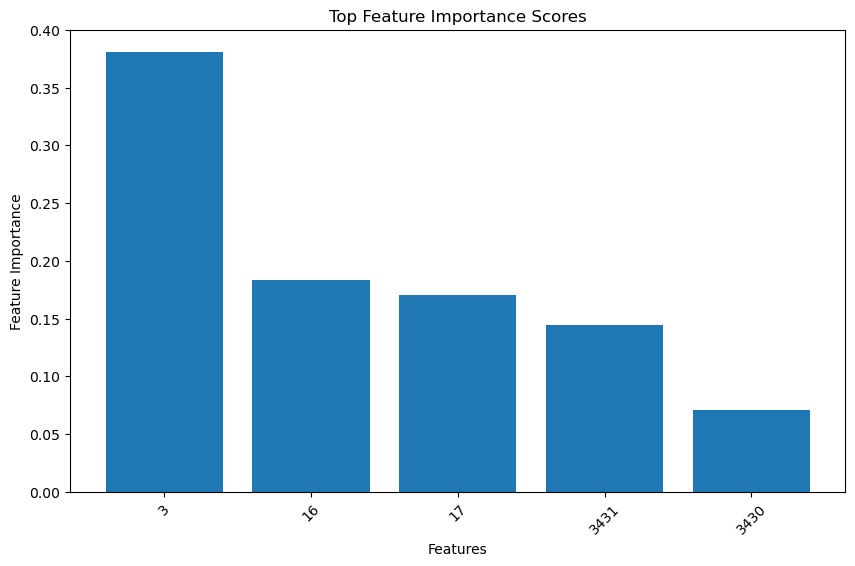

In [38]:
feature_importances = best_gbm_model.feature_importances_

num_top_features = 5
top_feature_indices = np.argsort(feature_importances)[::-1][:num_top_features]

top_features = [str(i) for i in top_feature_indices]

top_feature_importances = feature_importances[top_feature_indices]

plt.figure(figsize=(10, 6))
plt.bar(top_features, top_feature_importances)
plt.xlabel('Features')
plt.ylabel('Feature Importance')
plt.title('Top Feature Importance Scores')
plt.xticks(rotation=45)
plt.show()

In [32]:
def plot_confusion_matrix(model, x_test, y_test, title='Confusion Matrix'):
    y_pred = model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sb.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [33]:
best_dt_model.fit(x_train, y_train)
dt_test_accuracy = best_dt_model.score(x_test, y_test)
print("Decision Tree Test Accuracy:", dt_test_accuracy)

Decision Tree Test Accuracy: 0.9798694232861807


In [34]:
best_gbm_model.fit(x_train, y_train)
gbm_test_accuracy = best_gbm_model.score(x_test, y_test)
print("Gradient Boosting Test Accuracy:", gbm_test_accuracy)

Gradient Boosting Test Accuracy: 0.9782372143634385


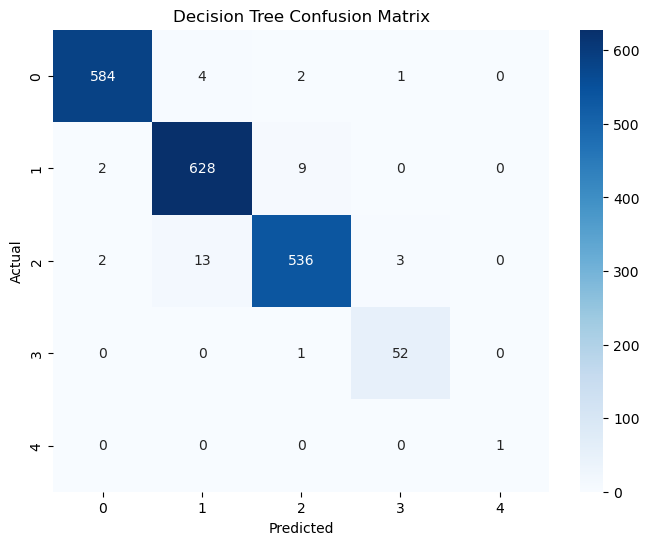

In [35]:
plot_confusion_matrix(best_dt_model, x_test, y_test, title='Decision Tree Confusion Matrix')

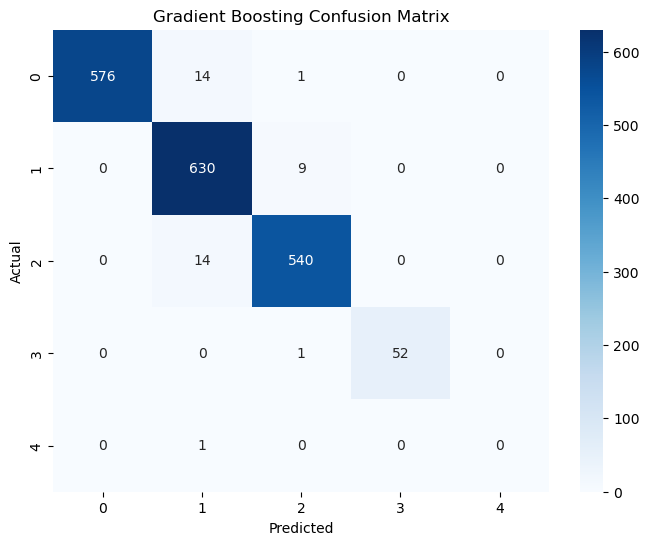

In [36]:
plot_confusion_matrix(best_gbm_model, x_test, y_test, title='Gradient Boosting Confusion Matrix')

It is hard to draw any definitive conclusions from the results without having a solid base of knowledge within the astrophysical field. Also, the data doesn't explicitly show the connection between the columns in the original dataset and the transformed data. Even so, the data provides a base for further analysis that can be used to formulate hypotheses that point toward physical laws that determine the patterns that can be found when examining the properties of exoplanets and the conditions they are typically located in. The results found in this process can therefore only act as a starting point or as research material to use when refining our understanding of planetary formation, evolution, and the broader dynamics of stellar systems.

## References

https://seaborn.pydata.org/tutorial/categorical.html

https://www.kaggle.com/code/artugceylan/nasa-exoplanets-eda-prediction

https://www.analyticsvidhya.com/blog/2021/10/handling-missing-value/

https://towardsdatascience.com/7-ways-to-handle-missing-values-in-machine-learning-1a6326adf79e

https://www.youtube.com/watch?v=VNfalYYduD4

https://scikit-learn.org/stable/common_pitfalls.html

https://www.analyticsvidhya.com/blog/2021/05/understanding-column-transformer-and-machine-learning-pipelines/

https://www.analyticsvidhya.com/blog/2021/09/gradient-boosting-algorithm-a-complete-guide-for-beginners/

https://insidelearningmachines.com/tune_hyperparameters_in_decision_trees/

https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/

https://www.aporia.com/learn/feature-importance/feature-importance-7-methods-and-a-quick-tutorial/